### Official State Tree of Colorado
##### The magnificent Colorado blue spruce (Picea pungens) is the official state tree of Colorado. School children of the state voted to name blue spruce as the state tree on Arbor Day in 1892, however it was not until 1939 that the Colorado blue spruce was officially adopted as the tree symbol of Colorado.
##### Known for its stately, majestic, symmetrical form and its beautiful silver-blue color, the Colorado blue spruce was first discovered on Pikes Peak in 1862 by botanist C.C. Parry, and named by George Engelmann in 1879. Blue spruce (Picea pungens Engelm) is also the state tree of Utah.
##### Sometimes called the silver spruce, the Colorado blue spruce ranges in color from green to blue to silver. In Colorado, it grows in small, scattered groves or singly among ponderosa pine, Douglas fir, alpine fir and Englemann spruce.
source https://statesymbolsusa.org/symbol/colorado/tree/colorado-blue-spruce

#### Habitat
##### Native Range
Blue spruce is primarily native to the central and southern Rocky Mountains of the western United States. Its range extends from latitude 33° 50' to 48° 54' N. and from longitude 104° 45' to 114° 00' W.; the Rocky Mountain region in high mountains from southern and western Wyoming, eastern Idaho, south to Utah, northern and eastern Arizona, southern New Mexico, to central Colorado. It has been reported in isolated locations in north-central Montana.

##### Climate
Blue spruce grows in a climatic zone that is generally cool and humid, with most of the annual precipitation occurring in the summer.

Mean annual temperatures where blue spruce is most commonly found in Colorado and the Southwest range from 3.9° to 6.1° C (39° to 43° F), with a January mean of -3.9° to -2.8° C (25° to 27° F) and a July mean of 13.9° to 15.0° C (57° to 59° F). Mean minimum January temperatures range from -11.1° to 8.9° C (12° to 16° F) and mean maximum July temperatures range from 21.1° to 22.2° C (70° to 72° F). The frost-free period from June to August is about 55 to 60 days (5,69).

Average annual precipitation varies from 460 to 610 mm (18 to 24 in). Winter is usually precipitation-deficient, with less than 20 percent of the annual moisture falling from December through March. Fifty percent of the annual precipitation is rain that falls during the growing season (5,69).

Although blue spruce grows best with abundant moisture, this species can withstand drought better than any other spruce (36). It can also withstand extremely low temperatures (-40° C; -40° F), and it is more resistant to high insolation and frost damage than other associated species.

##### Soils and Topography
Basic information on soils and landforms needed for silvicultural decisions for blue spruce is limited. Both soils and landforms are very complex. Soils are young and vary widely in texture and physical and chemical properties according to the bedrock from which they originate. Glacial deposits, alluvium from streams, and material weathered in place from country rock are predominant, however (2). The pH is 6.8 to 7.2, neutral to slightly alkaline (21,62). The soils on which blue spruce grows naturally are in the order Mollisols and, to a lesser extent, in the orders Histosols and Inceptisols.

Blue spruce is found on gentle upland and subirrigated slopes, in well-watered tributary drainages, extending down intermittent streams, and on lower northerly slopes. Sites on which blue spruce grows are more moist than those of Rocky Mountain ponderosa pine (Pinus ponderosa var. scopulorum) and warmer than those of Engelmann spruce (Picea engelmannii) and subalpine fir (Abies lasiocarpa) (2,65). In Utah, blue spruce is considered a pioneer tree species on wet soils (21).

Blue spruce is characteristically found at elevations from 1830 to 2740 m (6,000 to 9,000 ft) in its northern range and from 2130 to 3050 m (7,000 to 10,000 ft) in its southern range (27,65

source: https://www.srs.fs.usda.gov/pubs/misc/ag_654/volume_1/picea/pungens.htm

DATA to gather
from https://www2.census.gov/geo/tiger/TIGER2024/COUNTY/
Boulder County Outline 
Linear and area hydrography
At least one soil variable from the POLARIS dataset
Elevation from the SRTM (available from the APPEEARS API)
At least one climate variable from the MACAv2 dataset, accessible from Climate Toolbox. 

Possibly helpful https://pygis.io/docs/d_access_census.html
Census Data API key is 087d00b52d84075f630f0c4b15e3a0c683e5bdd1 for geba2669@colorado.edu
need to pip install census
https://medium.com/@wwjiang/exploring-u-s-census-data-with-python-a-step-by-step-guide-to-open-data-analysis-3f729f8033ad

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
# Open up the counties boundaries

cwd = os.getcwd()

SHAPE_RESTORE_SHX = True

print(cwd)

a_path = os.path.join(cwd,'tl_2024_us_county.shp')

print(a_path)

counties_gdf = (
     gpd.read_file(a_path)
) 

counties_gdf.head


# # We'll name the index so it will match the other data
# counties_gdf.index.name = 'FIPS'

# # Plot the ecoregions to check download
# counties_gdf.plot(edgecolor='black', color='skyblue')

c:\Users\gpaul\Documents\GitHub\bluespruce
c:\Users\gpaul\Documents\GitHub\bluespruce\tl_2024_us_county.shp


<bound method NDFrame.head of      STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ       NAME  \
0         31      039  00835841  31039  0500000US31039     Cuming   
1         53      069  01513275  53069  0500000US53069  Wahkiakum   
2         35      011  00933054  35011  0500000US35011    De Baca   
3         31      109  00835876  31109  0500000US31109  Lancaster   
4         31      129  00835886  31129  0500000US31129   Nuckolls   
...      ...      ...       ...    ...             ...        ...   
3230      13      123  00351260  13123  0500000US13123     Gilmer   
3231      27      135  00659513  27135  0500000US27135     Roseau   
3232      28      089  00695768  28089  0500000US28089    Madison   
3233      48      227  01383899  48227  0500000US48227     Howard   
3234      54      099  01550056  54099  0500000US54099      Wayne   

              NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
0        Cuming County   06      H1  G4020  None   None     None

In [3]:
import os
import geopandas as gpd

# Current working directory
cwd = os.getcwd()

# Path to shapefile
a_path = os.path.join(cwd, 'tl_2024_us_county.shp')

# Check if the .shx file exists
shx_path = os.path.splitext(a_path)[0] + '.shx'

if not os.path.exists(shx_path):
    print(f".shx file is missing at {shx_path}. Attempting to regenerate...")

    # Read the shapefile without .shx (if possible)
    counties_gdf = gpd.read_file(a_path)

    # Write it back to recreate missing .shx file
    counties_gdf.to_file(a_path)

    print(".shx file successfully regenerated.")
else:
    # If .shx exists, load the GeoDataFrame as usual
    counties_gdf = gpd.read_file(a_path)

# Display the first few rows of the GeoDataFrame
print(counties_gdf.head)

counties_gdf.STATEFP


<bound method NDFrame.head of      STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ       NAME  \
0         31      039  00835841  31039  0500000US31039     Cuming   
1         53      069  01513275  53069  0500000US53069  Wahkiakum   
2         35      011  00933054  35011  0500000US35011    De Baca   
3         31      109  00835876  31109  0500000US31109  Lancaster   
4         31      129  00835886  31129  0500000US31129   Nuckolls   
...      ...      ...       ...    ...             ...        ...   
3230      13      123  00351260  13123  0500000US13123     Gilmer   
3231      27      135  00659513  27135  0500000US27135     Roseau   
3232      28      089  00695768  28089  0500000US28089    Madison   
3233      48      227  01383899  48227  0500000US48227     Howard   
3234      54      099  01550056  54099  0500000US54099      Wayne   

              NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
0        Cuming County   06      H1  G4020  None   None     None

0       31
1       53
2       35
3       31
4       31
        ..
3230    13
3231    27
3232    28
3233    48
3234    54
Name: STATEFP, Length: 3235, dtype: object

<Axes: >

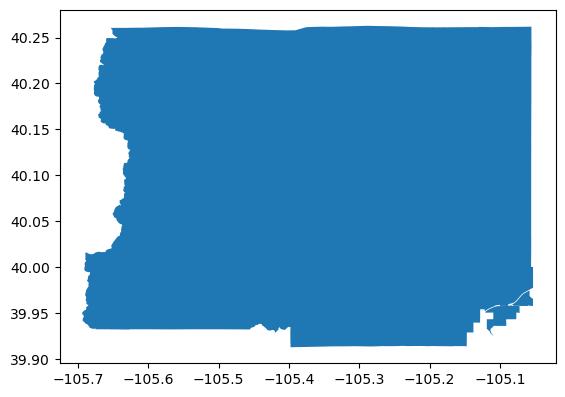

In [4]:
import geopandas    

boulder_gdf = counties_gdf[(counties_gdf.STATEFP=='08') & (counties_gdf.NAME=='Boulder')]

# Define the path for the output shapefile
output_path = 'boulder_county.shp'

# Write the GeoDataFrame to a shapefile
boulder_gdf.to_file(output_path, driver='ESRI Shapefile')

boulder_gdf.plot()


<Axes: >

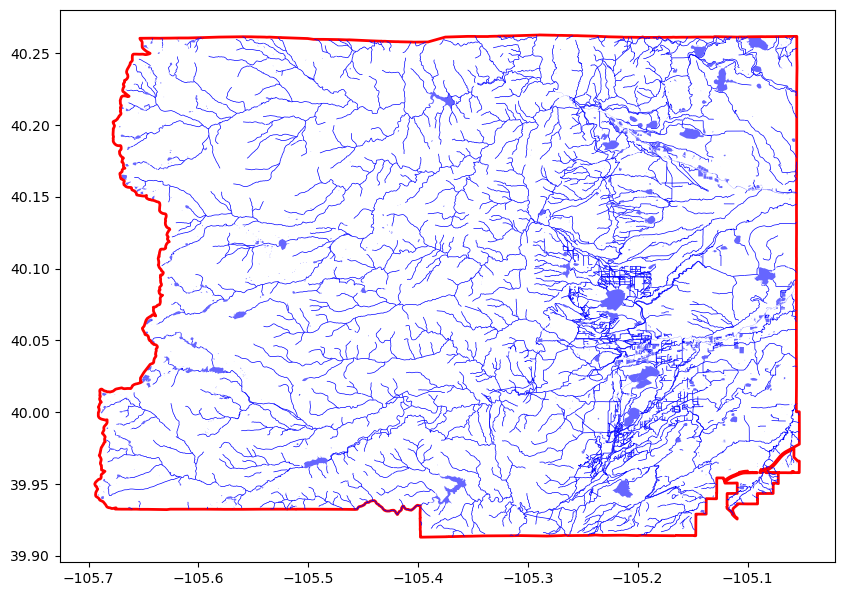

In [20]:
ar_path = os.path.join(cwd, 'tl_2024_08013_areawater.shp')
li_path = os.path.join(cwd, 'tl_2024_08013_linearwater.shp')

# Create a new plot
fig, ax = plt.subplots(figsize=(10, 10))
      
boulder_areawater_gdf = gpd.read_file(ar_path)
boulder_linearwater_gdf = gpd.read_file(li_path)

boulder_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2, label='Boulder County')
boulder_areawater_gdf.plot(ax=ax, color='blue', alpha=0.6, label='Area Water')
boulder_linearwater_gdf.plot(ax=ax, color='blue', linewidth=0.5, label='Linear Water')

In [18]:
boulder_linearwater_gdf.head

<bound method NDFrame.head of      ANSICODE      LINEARID            FULLNAME ARTPATH  MTFCC  \
0        None  110707441616                None       N  H3010   
1        None  110707441617                None       N  H3010   
2        None  110707441603                None       N  H3010   
3        None  110707442474                None       N  H3010   
4        None  110707441629                None       N  H3010   
...       ...           ...                 ...     ...    ...   
3981     None  110707442684                None       N  H3010   
3982     None  110707442686                None       N  H3010   
3983     None  110707432908         Hunters Crk       N  H3010   
3984     None  110707440348  North St Vrain Crk       N  H3010   
3985     None  110707442420                None       N  H3010   

                                               geometry  
0     LINESTRING (-105.46613 40.06176, -105.46619 40...  
1     LINESTRING (-105.46513 40.06196, -105.46518 40...  
2  

In [ ]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census  # not working
from us import states
import os

# Set API key
c = Census("075f630f0c4b15e3a0c683e5bdd1")

In [ ]:
import rioxarray as rxr

soil_url_template = (
    "http://hydrology....POLARIS
    "/ph"
    "/mean"
    "60_100"
    "/lat{min_lat}{max_la}_lon{max_lon}{min_lon}.tif   # because negative vs W listing
)

min_lat=26
min_lon=80

soil_da
